In [52]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import datetime
import time
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [53]:
all_stocks = pd.read_csv("./data/all_stocks_2006-01-01_to_2018-01-01.csv",parse_dates = ["Date"])

In [54]:
all_stocks.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


#Data Cleaning: 
1.Outlier Check
2.Fill missing values

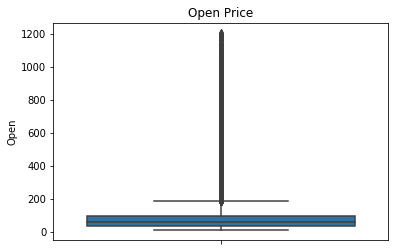

In [55]:
sns.boxplot(y="Open",data=all_stocks)
plt.title("Open Price")
plt.show()


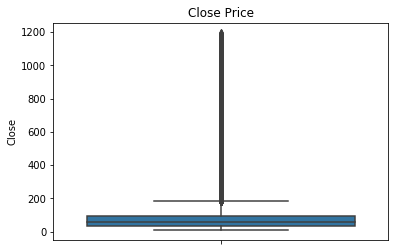

In [56]:
sns.boxplot(y="Close",data=all_stocks)
plt.title("Close Price")
plt.show()

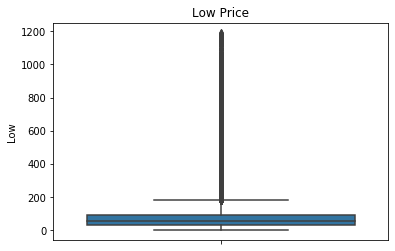

In [57]:
sns.boxplot(y="Low",data=all_stocks)
plt.title("Low Price")
plt.show()

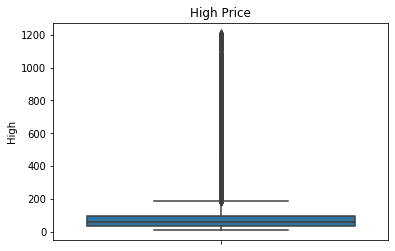

In [58]:
sns.boxplot(y="High",data=all_stocks)
plt.title("High Price")
plt.show()

In [59]:
for i in range(0,100,10):
    var = all_stocks['Open'].values
    var = np.sort(var,axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile values is ",var[-1])

0 percentile value is 6.75
10 percentile value is 22.91
20 percentile value is 30.04
30 percentile value is 37.8
40 percentile value is 48.78
50 percentile value is 60.05
60 percentile value is 72.46
70 percentile value is 85.84
80 percentile value is 106.06
90 percentile value is 157.23
100 percentile values is  nan


In [60]:
for i in range(90,100,1):
    var = all_stocks['Open'].values
    var = np.sort(var,axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile values is ",var[-1])

90 percentile value is 157.23
91 percentile value is 164.1
92 percentile value is 173.27
93 percentile value is 184.37
94 percentile value is 195.5
95 percentile value is 215.63
96 percentile value is 245.53
97 percentile value is 296.72
98 percentile value is 423.82
99 percentile value is 715.9
100 percentile values is  nan


In [61]:
all_stocks[all_stocks['Open']>1200]

,Date,Open,High,Low,Close,Volume,Name
90569,2017-11-27,1202.66,1213.41,1191.15,1195.83,6744045,AMZN
90570,2017-11-28,1204.88,1205.34,1188.52,1193.60,4559449,AMZN


In [62]:
for i in range(0,100,10):
    var = all_stocks['Close'].values
    var = np.sort(var,axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile values is ",var[-1])

0 percentile value is 6.66
10 percentile value is 22.9
20 percentile value is 30.04
30 percentile value is 37.8
40 percentile value is 48.78
50 percentile value is 60.05
60 percentile value is 72.49
70 percentile value is 85.85
80 percentile value is 106.07
90 percentile value is 157.06
100 percentile values is  1195.83


In [63]:
for i in range(0,100,10):
    var = all_stocks['High'].values
    var = np.sort(var,axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile values is ",var[-1])

0 percentile value is 7.17
10 percentile value is 23.21
20 percentile value is 30.35
30 percentile value is 38.18
40 percentile value is 49.28
50 percentile value is 60.64
60 percentile value is 73.18
70 percentile value is 86.55
80 percentile value is 106.87
90 percentile value is 158.47
100 percentile values is  nan


In [64]:
for i in range(0,100,10):
    var = all_stocks['Low'].values
    var = np.sort(var,axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile values is ",var[-1])

0 percentile value is 0.0
10 percentile value is 22.59
20 percentile value is 29.74
30 percentile value is 37.4
40 percentile value is 48.26
50 percentile value is 59.5
60 percentile value is 71.78
70 percentile value is 85.05
80 percentile value is 105.18
90 percentile value is 155.93
100 percentile values is  nan


In [65]:
all_stocks.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [66]:
all_stocks[all_stocks.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,NaN,201.66,NaN,201.17,1833625,MMM
5933,2017-07-31,NaN,85.70,NaN,85.23,3079797,AXP
11972,2017-07-31,NaN,NaN,NaN,242.46,5777271,BA
14992,2017-07-31,NaN,NaN,NaN,113.95,4486013,CAT
18012,2017-07-31,NaN,110.00,NaN,109.19,7561205,CVX
24051,2017-07-31,NaN,NaN,45.79,45.84,13622891,KO
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS
27071,2017-07-31,NaN,110.14,NaN,109.93,6815349,DIS
30091,2017-07-31,NaN,80.39,NaN,80.04,12820175,XOM
33111,2017-07-31,NaN,25.69,NaN,25.61,30616287,GE


In [68]:
rng = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
rng[~rng.isin(all_stocks.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [69]:
all_stocks.groupby('Name').count().sort_values('Date', ascending=False)['Date']

Name
JNJ      3020
JPM      3020
WMT      3020
VZ       3020
UTX      3020
UNH      3020
TRV      3020
PG       3020
PFE      3020
NKE      3020
MMM      3020
MCD      3020
KO       3020
XOM      3020
GE       3020
IBM      3020
HD       3020
GS       3020
AXP      3020
BA       3020
CAT      3020
DIS      3020
CVX      3020
CSCO     3019
AMZN     3019
INTC     3019
AAPL     3019
MSFT     3019
MRK      3019
GOOGL    3019
AABA     3019
Name: Date, dtype: int64

In [70]:
gdf = all_stocks[all_stocks.Name == 'AABA']
cdf = all_stocks[all_stocks.Name == 'CAT']
cdf[~cdf.Date.isin(gdf.Date)]

,Date,Open,High,Low,Close,Volume,Name
13147,2010-04-01,63.29,64.2,63.29,63.99,7830447,CAT


In [71]:
# Total number of companies
all_stocks.Name.unique().size

31

In [72]:
all_stocks.groupby('Date').Name.unique().apply(len)

Date
2006-01-03    31
2006-01-04    31
2006-01-05    31
2006-01-06    31
2006-01-09    31
2006-01-10    31
2006-01-11    31
2006-01-12    31
2006-01-13    31
2006-01-17    31
2006-01-18    31
2006-01-19    31
2006-01-20    31
2006-01-23    31
2006-01-24    31
2006-01-25    31
2006-01-26    31
2006-01-27    31
2006-01-30    31
2006-01-31    31
2006-02-01    31
2006-02-02    31
2006-02-03    31
2006-02-06    31
2006-02-07    31
2006-02-08    31
2006-02-09    31
2006-02-10    31
2006-02-13    31
2006-02-14    31
              ..
2017-11-16    31
2017-11-17    31
2017-11-20    31
2017-11-21    31
2017-11-22    31
2017-11-24    31
2017-11-27    31
2017-11-28    31
2017-11-29    31
2017-11-30    31
2017-12-01    31
2017-12-04    31
2017-12-05    31
2017-12-06    31
2017-12-07    31
2017-12-08    31
2017-12-11    31
2017-12-12    31
2017-12-13    31
2017-12-14    31
2017-12-15    31
2017-12-18    31
2017-12-19    31
2017-12-20    31
2017-12-21    31
2017-12-22    31
2017-12-26    31
2017-12-2

In [73]:
all_stocks.set_index('Date', inplace=True)

#Backfill `Open` column
values = np.where(all_stocks['2017-07-31']['Open'].isnull(), all_stocks['2017-07-28']['Open'], all_stocks['2017-07-31']['Open'])
all_stocks['2017-07-31']= all_stocks['2017-07-31'].assign(Open=values.tolist())

values = np.where(all_stocks['2017-07-31']['Close'].isnull(), all_stocks['2017-07-28']['Close'], all_stocks['2017-07-31']['Close'])
all_stocks['2017-07-31']= all_stocks['2017-07-31'].assign(Close=values.tolist())

values = np.where(all_stocks['2017-07-31']['High'].isnull(), all_stocks['2017-07-28']['High'], all_stocks['2017-07-31']['High'])
all_stocks['2017-07-31']= all_stocks['2017-07-31'].assign(High=values.tolist())

values = np.where(all_stocks['2017-07-31']['Low'].isnull(), all_stocks['2017-07-28']['Low'], all_stocks['2017-07-31']['Low'])
all_stocks['2017-07-31']= all_stocks['2017-07-31'].assign(Low=values.tolist())

all_stocks.reset_index(inplace=True)
all_stocks[all_stocks.Date == '2017-07-31']

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,200.79,201.66,198.69,201.17,1833625,MMM
5933,2017-07-31,83.88,85.70,83.62,85.23,3079797,AXP
8952,2017-07-31,149.90,150.33,148.13,148.73,19845920,AAPL
11972,2017-07-31,240.82,242.00,238.55,242.46,5777271,BA
14992,2017-07-31,114.45,114.90,113.48,113.95,4486013,CAT
18012,2017-07-31,106.71,110.00,106.36,109.19,7561205,CVX
21031,2017-07-31,31.54,31.59,31.37,31.45,19256428,CSCO
24051,2017-07-31,46.00,46.12,45.79,45.84,13622891,KO
27071,2017-07-31,109.98,110.14,109.66,109.93,6815349,DIS
30091,2017-07-31,79.65,80.39,78.27,80.04,12820175,XOM


In [75]:
missing_data_stocks = ['CSCO','AMZN','INTC','AAPL','MSFT','MRK','GOOGL', 'AABA']
columns = all_stocks.columns.values

In [78]:
for stock in missing_data_stocks:
    tdf = all_stocks[(all_stocks.Name == stock) & (all_stocks.Date == '2014-03-28')].copy()
    tdf.Date = '2014-04-01'
    pd.concat([all_stocks, tdf])
print("Complete")

Complete


In [80]:
all_stocks[(all_stocks.Name == 'CSCO') & (all_stocks.Date == '2014-04-01')]

,Date,Open,High,Low,Close,Volume,Name
20192,2014-04-01,22.33,23.31,22.3,23.1,80113826,CSCO


In [81]:
all_stocks[all_stocks.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS


In [82]:
all_stocks = all_stocks[~((all_stocks.Date == '2012-08-01') & (all_stocks.Name == 'DIS'))]

In [84]:
all_stocks.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [85]:
#We predict the average value of all the 4 prices present in the data, so we create a new column called "avgPrice"
all_stocks["avgPrice"] = (all_stocks['High']+all_stocks['Low']+all_stocks['Open']+all_stocks['Close'])/4

In [86]:
all_stocks.head()

,Date,Open,High,Low,Close,Volume,Name,avgPrice
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,78.3650
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,78.9850
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,78.1525
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,78.4525
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,78.9525


In [87]:
stock_names = all_stocks.Name.unique()
day_prices = all_stocks[all_stocks.Date == all_stocks.Date.min()].avgPrice
price_mapping = {n : c for n, c in zip(stock_names, day_prices)}
base_mapping = np.array(list(map(lambda x : price_mapping[x], all_stocks['Name'].values)))
all_stocks['Growth'] = all_stocks['avgPrice'] / base_mapping - 1
all_stocks.Growth.describe()

count    93611.000000
mean         0.789919
std          1.907922
min         -0.808701
25%          0.035007
50%          0.342423
75%          0.816421
max         24.392810
Name: Growth, dtype: float64

,Date,Open,High,Low,Close,Volume,Name,avgPrice,Growth
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE,17.380,-0.505794
30197,2017-12-29,84.00,84.20,83.64,83.64,8523411,XOM,83.870,0.460005
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE,36.290,0.528805
69454,2017-12-29,92.24,92.46,91.88,91.88,4346675,PG,92.115,0.577109
93611,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA,69.800,0.738372


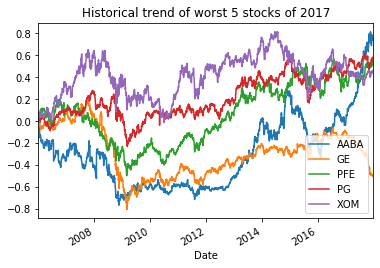

In [88]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
year_end_dates = sample_dates[sample_dates.is_year_end]
year_end_dates
worst_stocks = all_stocks[all_stocks.Date == all_stocks.Date.max()].sort_values('Growth').head(5)
best_stocks = all_stocks[all_stocks.Date == all_stocks.Date.max()].sort_values('Growth', ascending=False).head(5)
ws = worst_stocks.Name.values
bs = best_stocks.Name.values
tdf = all_stocks.copy()
tdf = all_stocks.set_index('Date')
tdf[tdf.Name.isin(ws)].groupby('Name').Growth.plot(title='Historical trend of worst 5 stocks of 2017', legend=True)
worst_stocks

,Date,Open,High,Low,Close,Volume,Name,avgPrice,Growth
90592,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN,1175.83,23.865556
9058,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL,169.89,15.172299
63414,2017-12-29,63.21,63.37,62.55,62.55,5222115,NKE,62.92,4.828624
54356,2017-12-29,172.98,172.98,171.92,172.12,2201771,MCD,172.50,4.099778
87573,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL,1054.91,3.925631


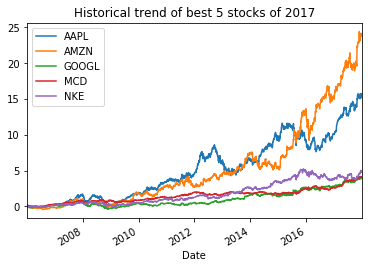

In [89]:
tdf[tdf.Name.isin(bs)].groupby('Name').Growth.plot(title='Historical trend of best 5 stocks of 2017', legend=True)
best_stocks

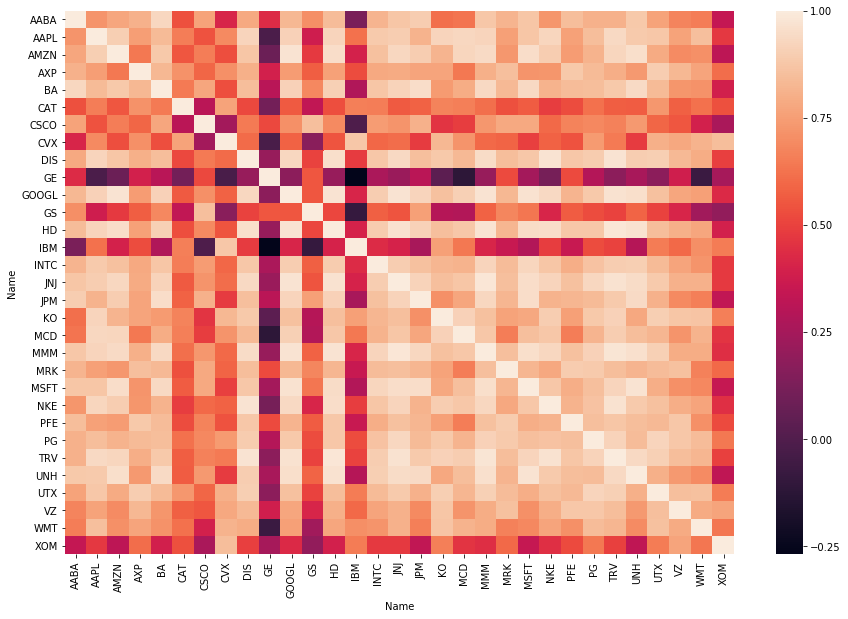

In [90]:
corr = all_stocks.pivot('Date', 'Name', 'Growth').corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr)

In [91]:
#Reference: http://www.insightsbot.com/augmented-dickey-fuller-test-in-python/
#Performing Augmented Dickey Fuller test to see if the data is stationary
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)


#divide the data into train and test data based on time
#data between the years 2006 to 2016 is taken as train data and the data from 2017 to 2018 is taken as test data

In [92]:
#we predict the avgPrice for "Amazon"
all_stocks_amazon = all_stocks[all_stocks['Name']=='AMZN']

Percentage of train data: 91.6859887379927
Percentage of test data: 8.314011262007288


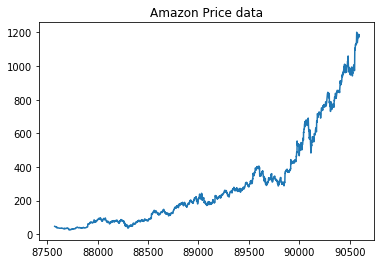

In [93]:
mask = (all_stocks_amazon['Date'] >= '2006-01-01') & (all_stocks_amazon['Date']<'2017-01-01')
all_stocks_amazon_train_arima = all_stocks_amazon[mask]
all_stocks_amazon_test_arima = all_stocks_amazon.loc[~mask]
print("Percentage of train data: {}".format((len(all_stocks_amazon_train_arima)/len(all_stocks_amazon))*100))
print("Percentage of test data: {}".format((len(all_stocks_amazon_test_arima)/len(all_stocks_amazon))*100))
plt.title("Amazon Price data")
plt.plot(all_stocks_amazon["avgPrice"])

In [94]:
#check if the amazon data is stationary
#From the results it is found that data is not stationary
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(all_stocks_amazon["avgPrice"], printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic         2.980665
P-Value                    1.000000
# Lags Used               29.000000
# Observations Used     2989.000000
Critical Value (1%)       -3.432540
Critical Value (5%)       -2.862507
Critical Value (10%)      -2.567285
dtype: float64
Is the time series stationary? False


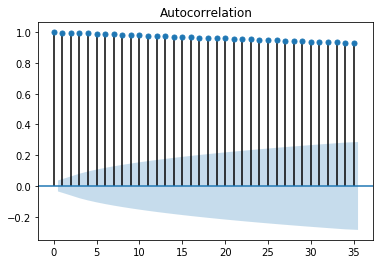

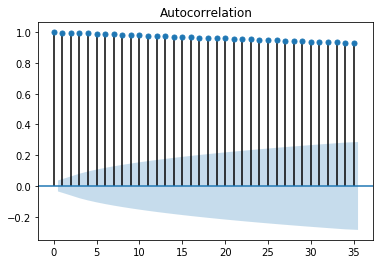

In [95]:
plot_acf(all_stocks_amazon["avgPrice"])

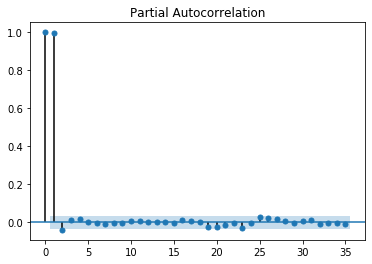

In [96]:
plot_pacf(all_stocks_amazon["avgPrice"])
plt.show()

In [97]:
#index the data with date to perform arima model
all_stocks_amazon_train_arima = all_stocks_amazon_train_arima.set_index('Date')
all_stocks_amazon_test_arima = all_stocks_amazon_test_arima.set_index('Date')
all_stocks_amazon_train_arima.index = pd.DatetimeIndex(all_stocks_amazon_train_arima.index).to_period('D')
all_stocks_amazon_test_arima.index = pd.DatetimeIndex(all_stocks_amazon_test_arima.index).to_period('D')

In [98]:
#Fit the arima model on amazon data
model = ARIMA(all_stocks_amazon_train_arima['avgPrice'],order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
#model_fit.plot_predict(start = 2517,end = 3020)
#plt.show()

                             ARIMA Model Results                              
Dep. Variable:             D.avgPrice   No. Observations:                 2767
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8356.720
Method:                       css-mle   S.D. of innovations              4.959
Date:                Tue, 05 May 2020   AIC                          16723.439
Time:                        20:49:51   BIC                          16753.067
Sample:                    01-04-2006   HQIC                         16734.140
                         - 12-30-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2566      0.103      2.490      0.013       0.055       0.459
ar.L1.D.avgPrice     0.7265      0.167      4.350      0.000       0.399       1.054
ar.L2.D.avgPrice    -0.1358 

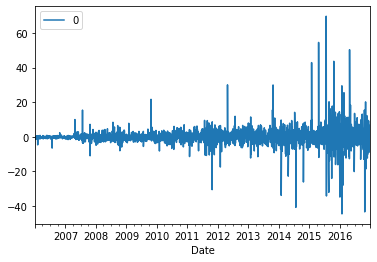

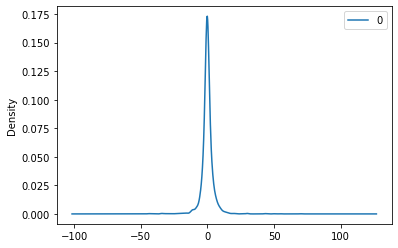

                 0
count  2767.000000
mean     -0.000016
std       4.959838
min     -44.546134
25%      -1.418642
50%      -0.135437
75%       1.352322
max      69.707675


In [99]:
residuals = DataFrame(model_fit.resid)
#print(residuals)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [100]:
#forecast the data in test set
fc, se, conf = model_fit.forecast(251, alpha=0.05)
fc_series = pd.Series(fc, index=all_stocks_amazon_test_arima.index)
lower_series = pd.Series(conf[:, 0], index=all_stocks_amazon_test_arima.index)
upper_series = pd.Series(conf[:, 1], index=all_stocks_amazon_test_arima.index)


In [101]:
mape_arima = (mean_absolute_error(all_stocks_amazon_test_arima.avgPrice, fc_series))/(sum(all_stocks_amazon_test_arima.avgPrice)/len(all_stocks_amazon_test_arima.avgPrice))*100
rmse_arima = np.sqrt(np.sum((fc_series-all_stocks_amazon_test_arima.avgPrice)**2))
print("Mean absolute percentage error for Arima model is:",round(mape_arima,2))
#print("RMSE for Arima model is:",round(rmse_arima,2))

Mean absolute percentage error for Arima model is: 18.42


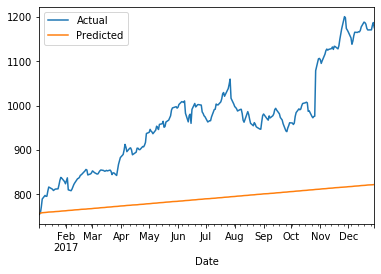

In [102]:
fp = fc_series
ap = all_stocks_amazon_test_arima.avgPrice
pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
ax = pdf.plot()

LSTM model to predict stock price for amazon data

In [103]:
#create test and train data for LSTM
amazon_data_lstm = all_stocks_amazon[['Date','avgPrice']]
training_set_amazon_lstm = amazon_data_lstm[amazon_data_lstm.Date.dt.year != 2017].avgPrice.values
test_set_amazon_lstm = amazon_data_lstm[amazon_data_lstm.Date.dt.year == 2017].avgPrice.values
print("Training set size: ",training_set_amazon_lstm.size)
print("Test set size: ", test_set_amazon_lstm.size)

Training set size:  2768
Test set size:  251


In [104]:
#scale the data to perform LSTM model
scaler = MinMaxScaler()
training_set_amazon_lstm_scaled = scaler.fit_transform(training_set_amazon_lstm.reshape(-1, 1))

In [105]:
#functions to create training and test data to build LSTM model
##Previous 30 days avgPrice values are taken as features to predict the avgPrice value of a given day
def create_train_data(training_set_amazon_lstm_scaled):
    X_train, y_train = [], []
    for i in range(30, training_set_amazon_lstm_scaled.size):
        X_train.append(training_set_amazon_lstm_scaled[i-30: i])
        y_train.append(training_set_amazon_lstm_scaled[i])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train, y_train

def create_test_data():
    X_test,y_test = [],[]
    inputs = amazon_data_lstm[len(amazon_data_lstm) - len(test_set_amazon_lstm) - 30:].avgPrice.values
    inputs = scaler.transform(inputs.reshape(-1, 1))
    for i in range(30, test_set_amazon_lstm.size+30): 
        X_test.append(inputs[i - 30: i, 0])
        y_test.append(inputs[i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test,y_test

In [106]:
#create train and test data
X_train_amazon_lstm, y_train_amazon_lstm = create_train_data(training_set_amazon_lstm_scaled)
X_test_amazon_lstm,y_test_amazon_lstm = create_test_data()

In [107]:
print(X_train_amazon_lstm.shape)
print(y_train_amazon_lstm.shape)

(2738, 30, 1)
(2738, 1)


In [108]:
def create_simple_model():
    model = Sequential()
    model.add(LSTM(units = 10, return_sequences = False, input_shape = (X_train_amazon_lstm.shape[1], 1)))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    return model

def compile_and_run(model, epochs=50, batch_size=64):
    model.compile(metrics=['accuracy'], optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train_amazon_lstm, y_train_amazon_lstm, epochs=epochs, batch_size=batch_size, verbose=3)
    return history

def plot_metrics(history):
    metrics_df = pd.DataFrame(data={"loss": history.history['loss']})
    metrics_df.plot()

def make_predictions(X_test_amazon_lstm, model):
    y_pred = model.predict(X_test_amazon_lstm)
    final_predictions = scaler.inverse_transform(y_pred)
    fp = np.ndarray.flatten(final_predictions)
    ap = np.ndarray.flatten(test_set_amazon_lstm)
    pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
    ax = pdf.plot()
    return final_predictions

In [109]:
simple_model = create_simple_model()
history = compile_and_run(simple_model, epochs=20)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


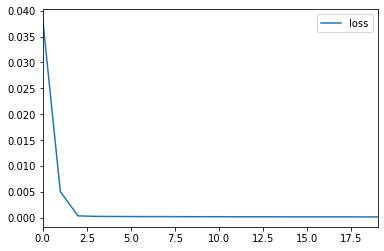

In [110]:
plot_metrics(history)

In [111]:
simple_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


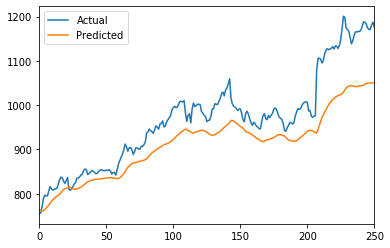

In [112]:
y_pred = make_predictions(X_test_amazon_lstm, simple_model)

In [113]:
mape_lstm_simple = (mean_absolute_error(test_set_amazon_lstm, y_pred))/(sum(test_set_amazon_lstm)/len(test_set_amazon_lstm))*100
rmse_lstm_simple = np.sqrt(np.sum((test_set_amazon_lstm-y_pred)**2))
print("Mean absolute percentage error for Simple LSTM model is:",round(mape_lstm_simple,2))
#print("RMSE for Simple LSTM model is:",round(rmse_lstm_simple,2))

Mean absolute percentage error for Simple LSTM model is: 5.7


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch

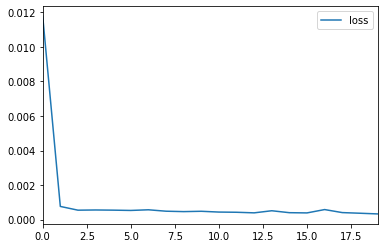

In [114]:
#Build a Deep NN
from keras.layers.normalization import BatchNormalization
def create_dl_model():
    model = Sequential()
    
    #Adding the LSTM layers
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_amazon_lstm.shape[1], 1)))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 50, return_sequences = True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 50, return_sequences = True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 50))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())

    # Adding the output layer
    model.add(Dense(units = 1))
    return model

dl_model = create_dl_model()
dl_model.summary()
history = compile_and_run(dl_model, epochs=20)
plot_metrics(history)

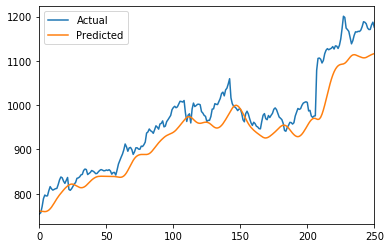

In [115]:
y_pred_dnn = make_predictions(X_test_amazon_lstm, dl_model)

In [116]:
mape_lstm_dnn = (mean_absolute_error(test_set_amazon_lstm, y_pred_dnn))/(sum(test_set_amazon_lstm)/len(test_set_amazon_lstm))*100
rmse_lstm_dnn = np.sqrt(np.sum((test_set_amazon_lstm-y_pred_dnn)**2))
print("Mean absolute percentage error for Deep Neural network model is:",round(mape_lstm_dnn,2))
# print("RMSE for Deep Neural network model is:",round(rmse_lstm_dnn,2))

Mean absolute percentage error for Deep Neural network model is: 3.86


<function print>

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 30, 100)           40800     
_________________________________________________________________
lstm_12 (LSTM)               (None, 30, 100)           80400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 100)           80400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 282,101
Trainable params: 282,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epo

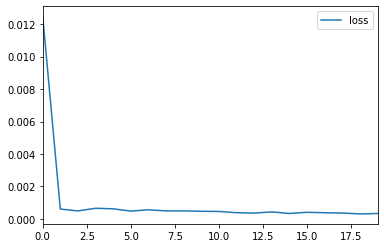

In [117]:
from keras.layers.normalization import BatchNormalization
def create_dl_model():
    model = Sequential()
    
    #Adding the LSTM layers
    model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train_amazon_lstm.shape[1], 1)))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 100, return_sequences = True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 100, return_sequences = True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 100))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())

    # Adding the output layer
    model.add(Dense(units = 1))
    return model

dl_model = create_dl_model()
dl_model.summary()
history = compile_and_run(dl_model, epochs=20)
plot_metrics(history)

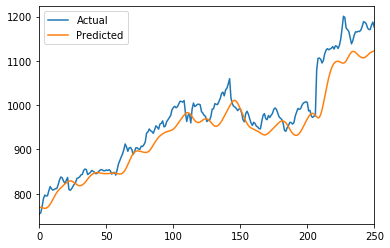

In [118]:
y_pred_dnn_100 = make_predictions(X_test_amazon_lstm, dl_model)

In [119]:
mape_lstm_dnn_100 = (mean_absolute_error(test_set_amazon_lstm, y_pred_dnn_100))/(sum(test_set_amazon_lstm)/len(test_set_amazon_lstm))*100
rmse_lstm_dnn = np.sqrt(np.sum((test_set_amazon_lstm-y_pred_dnn)**2))
print("Mean absolute percentage error for Deep Neural network model is:",round(mape_lstm_dnn_100,2))
print#("RMSE for Deep Neural network model is:",round(rmse_lstm_dnn,2))

Mean absolute percentage error for Deep Neural network model is: 3.17


<function print>

In [132]:
str(round(mape_lstm_dnn_100,2))

'3.17'

In [120]:
#Create train and test data to perfrom Linear Regression, Random Forest regression and XGBoost Regression
#Previous 30 days avgPrice values are taken as features to predict the avgPrice value of a given day
def create_train_data(training_set_scaled):
    X_train, y_train = [], []
    for i in range(30, training_set_scaled.size):
        X_train.append(training_set_scaled[i-30: i])
        y_train.append(training_set_scaled[i])
    # Converting list to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train, y_train

def create_test_data():
    X_test = []
    inputs = amazon_data_lstm[len(amazon_data_lstm) - len(test_set_amazon_lstm) - 30:].avgPrice.values
    inputs = inputs.reshape(-1, 1)
    for i in range(30, test_set_amazon_lstm.size+30): # Range of the number of values in the training dataset
        X_test.append(inputs[i - 30: i, 0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
    return X_test

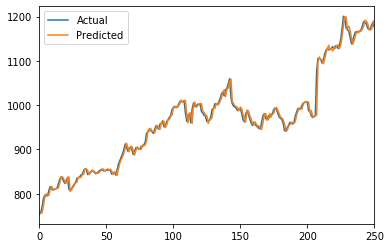

In [121]:
#linear regression on amazon data
X_train_lin,y_train_lin = create_train_data(training_set_amazon_lstm)
X_test_lin = create_test_data()
#print(X_train_lin.shape)

from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression().fit(X_train_lin, y_train_lin)

y_pred = lr_reg.predict(X_test_lin)
lr_test_predictions = [value for value in y_pred]
y_pred = lr_reg.predict(X_train_lin)
lr_train_predictions = [value for value in y_pred]

fp = lr_test_predictions
ap = np.ndarray.flatten(test_set_amazon_lstm)
pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
ax = pdf.plot()

In [122]:
mape_lr = (mean_absolute_error(test_set_amazon_lstm, lr_test_predictions))/(sum(test_set_amazon_lstm)/len(test_set_amazon_lstm))*100
rmse_lr = np.sqrt(np.sum((test_set_amazon_lstm-lr_test_predictions)**2))
print("Mean absolute percentage error for linear regression model is:",round(mape_lr,2))
#print("RMSE for linear regression model is:",round(rmse_lr,2))

Mean absolute percentage error for linear regression model is: 0.7


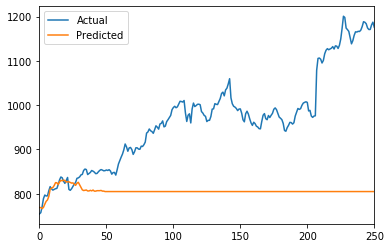

In [123]:
#Random Forest Regression on amazon data
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40)
regr1.fit(X_train_lin, y_train_lin)

y_pred = regr1.predict(X_test_lin)
rndf_test_predictions = [value for value in y_pred]
y_pred = regr1.predict(X_train_lin)
rndf_train_predictions = [value for value in y_pred]

fp = rndf_test_predictions
ap = np.ndarray.flatten(test_set_amazon_lstm)
pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
ax = pdf.plot()

In [124]:
mape_rndf = (mean_absolute_error(test_set_amazon_lstm, rndf_test_predictions))/(sum(test_set_amazon_lstm)/len(test_set_amazon_lstm))*100
rmse_rndf = np.sqrt(np.sum((test_set_amazon_lstm-rndf_test_predictions)**2))
print("Mean absolute percentage error for Random Forests is:",round(mape_rndf,2))
#print("RMSE for Random Forests is:",round(rmse_rndf,2))

Mean absolute percentage error for Random Forests is: 16.84


In [125]:
#XGBoost Regression on amazon data
x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)
x_model.fit(X_train_lin, y_train_lin)

y_pred = x_model.predict(X_test_lin)
xgb_test_predictions = [value for value in y_pred]
y_pred = x_model.predict(X_train_lin)
xgb_train_predictions = [value for value in y_pred]

[20:54:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


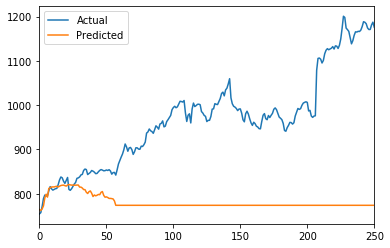

In [126]:
fp = xgb_test_predictions
ap = np.ndarray.flatten(test_set_amazon_lstm)
pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
ax = pdf.plot()

In [127]:
mape_xgb = (mean_absolute_error(test_set_amazon_lstm, xgb_test_predictions))/(sum(test_set_amazon_lstm)/len(test_set_amazon_lstm))*100
rmse_xgb = np.sqrt(np.sum((abs(test_set_amazon_lstm-xgb_test_predictions)**2)))
print("Mean absolute percentage error for XGBoost regression is:",round(mape_xgb,2))
#print("RMSE for XGBoost regression is:",round(rmse_xgb,2))

Mean absolute percentage error for XGBoost regression is: 19.4
